Used cars catalog
<br>link:https://www.kaggle.com/lepchenkov/usedcarscatalog?select=cars.csv
<br>The data is scraped in Belarus (western Europe) on the 2nd of December 2019, so the dataset is pretty fresh and relevant. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('cars.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
manufacturer_name    38531 non-null object
model_name           38531 non-null object
transmission         38531 non-null object
color                38531 non-null object
odometer_value       38531 non-null int64
year_produced        38531 non-null int64
engine_fuel          38531 non-null object
engine_has_gas       38531 non-null bool
engine_type          38531 non-null object
engine_capacity      38521 non-null float64
body_type            38531 non-null object
has_warranty         38531 non-null bool
state                38531 non-null object
drivetrain           38531 non-null object
price_usd            38531 non-null float64
is_exchangeable      38531 non-null bool
location_region      38531 non-null object
number_of_photos     38531 non-null int64
up_counter           38531 non-null int64
feature_0            38531 non-null bool
feature_1            38531 non-null bool


In [4]:
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,...,True,False,False,True,True,False,False,True,True,307
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,False,False,True,73
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,...,True,True,True,True,True,True,True,True,True,87
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,...,True,True,False,False,True,False,False,False,True,43


In [5]:
data.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [6]:
data['engine_capacity']

0        2.5
1        3.0
2        2.5
3        3.0
4        2.5
5        2.5
6        2.5
7        2.5
8        2.5
9        2.5
10       2.0
11       3.6
12       2.0
13       1.3
14       2.5
15       2.0
16       3.0
17       2.0
18       2.0
19       2.0
20       2.5
21       3.0
22       3.0
23       2.5
24       2.5
25       3.0
26       2.0
27       2.5
28       2.0
29       2.0
        ... 
38501    2.4
38502    2.4
38503    2.7
38504    2.5
38505    3.2
38506    2.5
38507    2.5
38508    2.4
38509    3.3
38510    3.3
38511    2.4
38512    3.3
38513    2.4
38514    2.4
38515    3.3
38516    3.3
38517    2.5
38518    2.4
38519    2.4
38520    2.5
38521    2.0
38522    2.4
38523    2.5
38524    3.5
38525    2.0
38526    3.5
38527    2.2
38528    3.5
38529    2.0
38530    2.4
Name: engine_capacity, Length: 38531, dtype: float64

In [7]:
#check what dataset is null and why
data[data['engine_capacity'].isnull()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,57


In [8]:
#check how many electric vehicles
data[data['engine_fuel'] == 'electric']

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,57


In [9]:
data[data['engine_type'] == 'electric']

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,57


Engine Capacity is left empty for some of the vehicles because they are electric vehicle - there are only 10 vehicles. Even if they are contained in the data they are under represented and can skew the data entirely. For studying the data purposes - we will drop and ignore electric vehicles.

In [10]:
data['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

In [11]:
data['manufacturer_name'].value_counts()

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

Examining how price is affected by each of the vehicle features- manufacturer make and type

In [12]:
col = data.columns
col

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [13]:
car_df = data.dropna()

In [14]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 30 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_fuel          38521 non-null object
engine_has_gas       38521 non-null bool
engine_type          38521 non-null object
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null bool
state                38521 non-null object
drivetrain           38521 non-null object
price_usd            38521 non-null float64
is_exchangeable      38521 non-null bool
location_region      38521 non-null object
number_of_photos     38521 non-null int64
up_counter           38521 non-null int64
feature_0            38521 non-null bool
feature_1            38521 non-null bool


In [15]:
#drop columns related to electric vehicles
#drop number of photos - unrelated
car_df.drop(['engine_fuel', 'engine_type', 'number_of_photos'], axis=1, inplace = True)

C:\Users\D-9\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
car_df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_has_gas', 'engine_capacity',
       'body_type', 'has_warranty', 'state', 'drivetrain', 'price_usd',
       'is_exchangeable', 'location_region', 'up_counter', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [17]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 27 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_has_gas       38521 non-null bool
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null bool
state                38521 non-null object
drivetrain           38521 non-null object
price_usd            38521 non-null float64
is_exchangeable      38521 non-null bool
location_region      38521 non-null object
up_counter           38521 non-null int64
feature_0            38521 non-null bool
feature_1            38521 non-null bool
feature_2            38521 non-null bool
feature_3            38521 non-null bool
feature_4            38521 non-null bool
featu

In [18]:
X = car_df.drop('price_usd', axis = 1)
y = car_df['price_usd']

In [19]:
X

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_has_gas,engine_capacity,body_type,has_warranty,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,False,2.5,universal,False,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,False,3.0,universal,False,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,False,2.5,suv,False,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,False,3.0,sedan,False,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,False,2.5,universal,False,...,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,False,2.5,universal,False,...,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,False,2.5,universal,False,...,True,False,False,True,True,False,False,True,True,307
7,Subaru,Legacy,automatic,silver,350000,2004,False,2.5,sedan,False,...,True,True,False,False,False,False,False,False,True,73
8,Subaru,Outback,automatic,grey,179000,2010,False,2.5,universal,False,...,True,True,True,True,True,True,True,True,True,87
9,Subaru,Forester,automatic,silver,571317,1999,False,2.5,universal,False,...,True,True,False,False,True,False,False,False,True,43


In [20]:
y

0        10900.00
1         5000.00
2         2800.00
3         9999.00
4         2134.11
5        14700.00
6         3000.00
7         4500.00
8        12900.00
9         4200.00
10        6900.00
11        8350.00
12        4300.00
13        1666.00
14        8600.00
15        7300.00
16        7587.97
17       10950.00
18       12700.00
19       16500.00
20        8700.00
21        7500.00
22        8650.00
23        3500.00
24        3800.00
25        7200.00
26        1850.00
27        3800.00
28        3000.00
29        6200.00
           ...   
38501     4200.00
38502     4900.00
38503     1300.00
38504     3500.00
38505     3600.00
38506     3793.99
38507     6700.00
38508     3700.00
38509     5500.00
38510     7000.00
38511     5400.00
38512     4100.00
38513     3200.00
38514     3700.00
38515     4200.00
38516     3450.00
38517     6500.00
38518     2800.00
38519     2700.00
38520     1600.00
38521      550.00
38522     4000.00
38523     4220.81
38524     3000.00
38525     

In [21]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [22]:
X['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

<b>Car names cannot be process - we must replace the names with appropriate english characters

In [23]:
X['manufacturer_name'].replace(['Москвич', 'ГАЗ', 'ВАЗ', 'ЗАЗ', 'УАЗ'], ['Moskvitch', 'Gaz', 'Vaz', 'Zaz', 'Uaz'], inplace = True)

In [24]:
X['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'Uaz', 'Kia', 'Opel', 'Moskvitch',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'Vaz', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'Zaz', 'Toyota',
       'Gaz', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

In [25]:
model = X['model_name'].unique()
model.sort()
for i in model:
    print(i)

100
1007
100NX
106
107
11
110
111
1111
1119
112
116
118
12
120
121
125
1300
145
146
147
1500
155
156
159
164
166
180
19
190
2
200
200-Series
2008
200SX
205
206
207
208
21
2101
21011
21013
2102
2103
2104
2105
2106
2107
2108
2109
21099
2110
2111
2112
2113
2114
2115
2120
2121
21213
21214
2123
2125
2131
2140
2141
216
218
22
220
2206
225
235
24
240
2401
2402
2410
244
25
264
2705
2752
2757
3
300
3000GT
3008
301
306
307
308
309
3102
310210
310221
31029
3110
31105
315
3151
31512
31514
316
318
320
322
3221
322132
322133
323
3234
324
325
328
33
330
3302
3303
335
340
3500
350Z
360
3741
39099
3962
400
400-Series
4007
4008
401
402
403
405
406
407
408
410
412
420
423 Kombi
428
435
440
45
451
452
460
469
4Runner
4x4
5
500
5008
500L
500X
508
518
520
523
524
525
528
530
535
539
540
545
550
6
600-Series
605
607
620
626
630
635
640
645
650
69
725
728
730
732
735
740
745
75
750
760
80
800-Series
806
807
850
9
9 - 3
9 - 5
9 - 7X
9-2X
90
900
9000
911
929
940
960
965
966
968м
A1
A13
A140
A150
A160
A170
A180


In [26]:
X['model_name'].replace(['ВИС', 'Таврия', 'М20', 'М5', 'Соболь', 'Луидор'], ['Vis-Apto', 'Tavria', 'M20', 'M5', 'Sobol', 'Lada'], inplace = True)

In [27]:
model = X['model_name'].unique()
model.sort()
for i in model:
    print(i)

100
1007
100NX
106
107
11
110
111
1111
1119
112
116
118
12
120
121
125
1300
145
146
147
1500
155
156
159
164
166
180
19
190
2
200
200-Series
2008
200SX
205
206
207
208
21
2101
21011
21013
2102
2103
2104
2105
2106
2107
2108
2109
21099
2110
2111
2112
2113
2114
2115
2120
2121
21213
21214
2123
2125
2131
2140
2141
216
218
22
220
2206
225
235
24
240
2401
2402
2410
244
25
264
2705
2752
2757
3
300
3000GT
3008
301
306
307
308
309
3102
310210
310221
31029
3110
31105
315
3151
31512
31514
316
318
320
322
3221
322132
322133
323
3234
324
325
328
33
330
3302
3303
335
340
3500
350Z
360
3741
39099
3962
400
400-Series
4007
4008
401
402
403
405
406
407
408
410
412
420
423 Kombi
428
435
440
45
451
452
460
469
4Runner
4x4
5
500
5008
500L
500X
508
518
520
523
524
525
528
530
535
539
540
545
550
6
600-Series
605
607
620
626
630
635
640
645
650
69
725
728
730
732
735
740
745
75
750
760
80
800-Series
806
807
850
9
9 - 3
9 - 5
9 - 7X
9-2X
90
900
9000
911
929
940
960
965
966
968м
A1
A13
A140
A150
A160
A170
A180


In [28]:
X['location_region']

0            Минская обл.
1            Минская обл.
2            Минская обл.
3            Минская обл.
4         Гомельская обл.
5            Минская обл.
6            Минская обл.
7          Брестская обл.
8            Минская обл.
9            Минская обл.
10           Минская обл.
11           Минская обл.
12           Минская обл.
13        Гомельская обл.
14           Минская обл.
15           Минская обл.
16           Минская обл.
17           Минская обл.
18           Минская обл.
19           Минская обл.
20        Гомельская обл.
21           Минская обл.
22           Минская обл.
23           Минская обл.
24       Могилевская обл.
25        Гомельская обл.
26           Минская обл.
27         Брестская обл.
28           Минская обл.
29         Витебская обл.
               ...       
38501        Минская обл.
38502      Витебская обл.
38503      Брестская обл.
38504     Гомельская обл.
38505        Минская обл.
38506    Гродненская обл.
38507        Минская обл.
38508    Гро

In [29]:
location = X['location_region'].unique()
location.sort()
for i in location:
    print(i)

Брестская обл.
Витебская обл.
Гомельская обл.
Гродненская обл.
Минская обл.
Могилевская обл.


In [30]:
X['location_region'].replace(location, 
                             ['Brest Region', 'Vitebsk Region', 'Gomel Region', 
                              'Hrodna Region', 'Minsk Region', 'Mogilev Region'],
                            inplace = True)

In [31]:
X['location_region'].unique()

array(['Minsk Region', 'Gomel Region', 'Brest Region', 'Mogilev Region',
       'Vitebsk Region', 'Hrodna Region'], dtype=object)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 26 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_has_gas       38521 non-null bool
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null bool
state                38521 non-null object
drivetrain           38521 non-null object
is_exchangeable      38521 non-null bool
location_region      38521 non-null object
up_counter           38521 non-null int64
feature_0            38521 non-null bool
feature_1            38521 non-null bool
feature_2            38521 non-null bool
feature_3            38521 non-null bool
feature_4            38521 non-null bool
feature_5            38521 non-null bool
feature_

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 26 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_has_gas       38521 non-null bool
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null bool
state                38521 non-null object
drivetrain           38521 non-null object
is_exchangeable      38521 non-null bool
location_region      38521 non-null object
up_counter           38521 non-null int64
feature_0            38521 non-null bool
feature_1            38521 non-null bool
feature_2            38521 non-null bool
feature_3            38521 non-null bool
feature_4            38521 non-null bool
feature_5            38521 non-null bool
feature_

In [34]:
X_num = X.copy()
#X_num = X[['odometer_value', 'year_produced', 'engine_capacity', 'up_counter', 'duration_listed']]
#X_num[X['manufacturer_name'].unique()] = pd.get_dummies(X['manufacturer_name'])


<b>Convert variables to dummies variables

In [35]:
X_num['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

In [36]:
#convert transmission to dummies variables
X_num['transmission'].replace('automatic', 0, inplace = True)
X_num['transmission'].replace('mechanical', 1, inplace = True)

In [37]:
#automatic = 0
#mechanical = 1
print('automatic: ',X_num['transmission'].sum())
print('automatic proportion', (X_num['transmission'].sum())/len(X_num))
print('mechanical: ', len(X_num) - X_num['transmission'].sum())
print('mechancial proportion', (len(X_num) - X_num['transmission'].sum())/len(X_num))

automatic:  25633
automatic proportion 0.6654292463850886
mechanical:  12888
mechancial proportion 0.33457075361491134


In [38]:
#convert engine has gas to dummies variable
#True = 1
#False = 0
X_num['engine_has_gas'].replace(False, 0, inplace = True)
X_num['engine_has_gas'].replace(True, 1, inplace = True)


In [39]:
#convert has warranty to dummies variable
#True = 1
#False = 0
X_num['has_warranty'].replace(False, 0, inplace = True)
X_num['has_warranty'].replace(True, 1, inplace = True)


In [40]:
#convert is exchangeable to dummies variable
#True = 1
#False = 0
X_num['is_exchangeable'].replace(False, 0, inplace = True)
X_num['is_exchangeable'].replace(True, 1, inplace = True)


In [41]:
X_num.drop(['up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
            'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
            'feature_9', 'duration_listed'], axis = 1, inplace = True)

In [42]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 14 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null int64
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_has_gas       38521 non-null float64
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null float64
state                38521 non-null object
drivetrain           38521 non-null object
is_exchangeable      38521 non-null float64
location_region      38521 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 4.4+ MB


In [43]:
#convert to dummies variales
col_dummies = ['manufacturer_name', 'model_name', 'color', 'body_type', 'state',
              'drivetrain', 'is_exchangeable', 'location_region']

In [44]:
X_ = pd.concat([X_num, pd.get_dummies(X_num[col_dummies])], axis = 1)

After coverting the columns to dummies variables - delete the columns that have already been converted

In [45]:
X_.drop(col_dummies, axis = 1, inplace = True)

In [46]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Columns: 1213 entries, transmission to location_region_Vitebsk Region
dtypes: float64(3), int64(3), uint8(1207)
memory usage: 46.4 MB


In [47]:
lrm = linear_model.LinearRegression()
lrm.fit(X_,y)

LinearRegression()

In [48]:
import statsmodels.api as sm
X_ = sm.add_constant(X_)

results = sm.OLS(y, X_).fit()

results.summary()

C:\Users\D-9\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     172.1
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:01:25   Log-Likelihood:            -3.5661e+05
No. Observations:               38521   AIC:                         7.156e+05
Df Residuals:                   37345   BIC:                         7.256e+05
Df Model:                        1175                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -5.233e+05   3099.418   -168.839      0.000   -5.29e+05   -5.17e+05
transmission                     -335.4980     40.057     -8.376      0.000    -414.011    -256.986
odometer_value                     -0.0039      0.000    -30.752      0.000      -0.004      -0.004
year_produced                     534.3107      3.114    171.571      0.000     528.207     540.415
engine_has_gas                   -444.1878     75.528     -5.881      0.000    -592.225    -296.150
engine_capacity                  -646.8606     50.891    -12.711      0.000    -746.608    -547.113
has_warranty                     1847.1257    249.877      7.392      0.000    1357.360    2336.892
manufacturer_name_Acura         -8862.4950   2522.206     -3.514      0.000   -1.38e+04   -3918.902
manufacturer_name_Alfa Romeo    -1.551e+04   2460.084     -6.304      0.000   -2.03e+04   -1.07e+04
manufacturer_name_Audi          -4806.7869   2286.323     -2.102      0.036   -9288.042    -325.532
manufacturer_name_BMW           -1.396e+04   2213.551     -6.305      0.000   -1.83e+04   -9617.397
manufacturer_name_Buick         -8008.5926    777.424    -10.301      0.000   -9532.364   -6484.821
manufacturer_name_Cadillac      -8219.9671    522.326    -15.737      0.000   -9243.740   -7196.194
manufacturer_name_Chery         -1.119e+04   3501.846     -3.196      0.001   -1.81e+04   -4326.817
manufacturer_name_Chevrolet      2784.6879   2699.848      1.031      0.302   -2507.088    8076.464
manufacturer_name_Chrysler      -8386.5624    392.060    -21.391      0.000   -9155.011   -7618.113
manufacturer_name_Citroen       -1.277e+04    234.057    -54.580      0.000   -1.32e+04   -1.23e+04
manufacturer_name_Dacia         -1.196e+04   1265.938     -9.449      0.000   -1.44e+04   -9480.974
manufacturer_name_Daewoo         4226.3308   2769.492      1.526      0.127   -1201.950    9654.612
manufacturer_name_Dodge         -9969.4527    364.067    -27.384      0.000   -1.07e+04   -9255.872
manufacturer_name_Fiat          -1.073e+04   2107.882     -5.089      0.000   -1.49e+04   -6595.906
manufacturer_name_Ford          -9732.2416    234.174    -41.560      0.000   -1.02e+04   -9273.253
manufacturer_name_Gaz            4730.4957   1454.928      3.251      0.001    1878.798    7582.194
manufacturer_name_Geely         -1.605e+04    319.165    -50.297      0.000   -1.67e+04   -1.54e+04
manufacturer_name_Great Wall    -1.572e+04    568.715    -27.640      0.000   -1.68e+04   -1.46e+04
manufacturer_name_Honda         -1.039e+04   1170.534     -8.878      0.000   -1.27e+04   -8097.821
manufacturer_name_Hyundai       -1.246e+04   2023.874     -6.155      0.000   -1.64e+04   -8489.451
manufacturer_name_Infiniti      -6831.2608    344.680    -19.819      0.000   -7506

In [49]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_, y, test_size = 0.2, random_state = 42)

In [50]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(Xtrain, ytrain)

y_preds_train = lrm.predict(Xtrain)
y_preds_test = lrm.predict(Xtest)

In [51]:
Xtrain = sm.add_constant(Xtrain)
train_results = sm.OLS(ytrain,Xtrain).fit()
print(train_results.summary())

C:\Users\D-9\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     143.3
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:01:35   Log-Likelihood:            -2.8508e+05
No. Observations:               30816   AIC:                         5.724e+05
Df Residuals:                   29683   BIC:                         5.819e+05
Df Model:                        1132                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

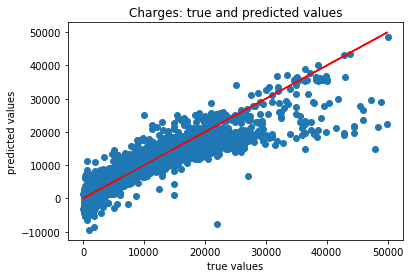

In [52]:
ypreds = results.predict(Xtest)
plt.scatter(ytest, ypreds)
plt.plot(ytest, ytest, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

<b>Let's cut down and narrow the columns that has higher correlation 

In [53]:
test = pd.DataFrame(X_,y).corr()

In [54]:
df = pd.DataFrame()
df['price_usd'] = y
df = pd.concat([df, X_], axis = 1)

In [55]:
test = df.corr()

In [56]:
test

,price_usd,const,transmission,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Brest Region,location_region_Gomel Region,location_region_Hrodna Region,location_region_Minsk Region,location_region_Mogilev Region,location_region_Vitebsk Region
price_usd,1.000000,NaN,-0.476201,-0.420965,0.705439,-0.062482,0.296597,0.285749,0.039562,-0.045172,...,-0.176626,0.439746,-0.315686,-0.031073,-0.070058,-0.074903,-0.077340,0.210119,-0.085715,-0.080049
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,-0.476201,NaN,1.000000,0.229648,-0.385235,-0.018669,-0.428596,-0.065499,-0.047783,0.045346,...,0.029819,-0.385109,0.325031,-0.035613,0.044489,0.038918,0.064816,-0.137265,0.051047,0.055385
odometer_value,-0.420965,NaN,0.229648,1.000000,-0.488448,0.057736,0.105704,-0.189577,-0.019648,0.016009,...,0.135680,-0.145625,-0.006850,0.154384,0.064753,0.042192,0.064217,-0.135672,0.041954,0.038136
year_produced,0.705439,NaN,-0.385235,-0.488448,1.000000,-0.074637,0.005059,0.209322,0.021474,-0.033232,...,-0.108513,0.215468,0.004017,-0.220514,-0.081892,-0.079965,-0.084019,0.219445,-0.094133,-0.065781
engine_has_gas,-0.062482,NaN,-0.018669,0.057736,-0.074637,1.000000,0.084579,-0.020672,0.005782,-0.004327,...,0.014057,0.022666,-0.017293,-0.000280,0.046712,0.002170,0.043205,-0.061413,0.025757,-0.002185
engine_capacity,0.296597,NaN,-0.428596,0.105704,0.005059,0.084579,1.000000,-0.054583,0.061033,-0.010168,...,0.057348,0.457811,-0.537321,0.237576,0.006775,-0.007973,-0.007664,0.018814,-0.009751,-0.016245
has_warranty,0.285749,NaN,-0.065499,-0.189577,0.209322,-0.020672,-0.054583,1.000000,-0.004499,-0.007982,...,-0.617028,0.047567,-0.003940,-0.042437,-0.030599,-0.029700,-0.026549,0.076435,-0.026831,-0.027092
manufacturer_name_Acura,0.039562,NaN,-0.047783,-0.019648,0.021474,0.005782,0.061033,-0.004499,1.000000,-0.003045,...,0.006064,0.044830,-0.021706,-0.016721,-0.002634,-0.010048,-0.008324,0.020139,-0.008856,-0.007375
manufacturer_name_Alfa Romeo,-0.045172,NaN,0.045346,0.016009,-0.033232,-0.004327,-0.010168,-0.007982,-0.003045,1.000000,...,-0.004108,-0.027590,0.042665,-0.027620,0.006546,0.001462,0.003825,-0.011874,0.000851,0.009055


In [57]:
tcol = test.columns

In [58]:
col_strong_corr = []
for i in tcol:
    if(abs(test[i].price_usd) >= .35):
        col_strong_corr.append(i)
        print(f'correlation: {test[i].price_usd} column: {i}')

correlation: 1.0 column: price_usd
correlation: -0.4762005949491794 column: transmission
correlation: -0.4209653793217638 column: odometer_value
correlation: 0.7054393045005988 column: year_produced
correlation: 0.43693618685886426 column: body_type_suv
correlation: 0.439745896087486 column: drivetrain_all


In [59]:
col_strong_corr

['price_usd',
 'transmission',
 'odometer_value',
 'year_produced',
 'body_type_suv',
 'drivetrain_all']

<b>Let's focus on the main columns with high correlation with value of the car in USD

In [60]:
col_strong_corr.remove(col_strong_corr[0])

In [61]:
X_corr = X_[col_strong_corr]

In [62]:
X_corr

,transmission,odometer_value,year_produced,body_type_suv,drivetrain_all
0,0,190000,2010,0,1
1,0,290000,2002,0,1
2,0,402000,2001,1,1
3,1,10000,1999,0,1
4,0,280000,2001,0,1
5,0,132449,2011,0,1
6,0,318280,1998,0,1
7,0,350000,2004,0,1
8,0,179000,2010,0,1
9,0,571317,1999,0,1


In [63]:
X_corr = X_[col_strong_corr]
X_corr = sm.add_constant(X_corr)

results = sm.OLS(y, X_corr).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 1.206e+04
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:05:39   Log-Likelihood:            -3.7426e+05
No. Observations:               38521   AIC:                         7.485e+05
Df Residuals:                   38515   BIC:                         7.486e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -8.66e+05   6216.530   -139.301      0.000   -8.78e+05   -8.54e+05
transmission   -1958.0242     49.907    -39.234      0.000   -2055.843   -1860.205
odometer_value    -0.0035      0.000    -20.287      0.000      -0.004      -0.003
year_produced    436.3853      3.090    141.218      0.000     430.329     442.442
body_type_suv   1703.0137     85.455     19.929      0.000    1535.520    1870.508
drivetrain_all  3564.4956     84.641     42.113      0.000    3398.597    3730.394
==============================================================================
Omnibus:                    21903.771   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           280057.254
Skew:                           2.496   Prob(JB):                         0.00
Kurtosis:                      15.230   Cond. No.                     8.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>R and R-square values are low - let's add more features

In [64]:
for col in test.columns:
    if(abs(test.price_usd[col]) > .15):
        print(col+" "+str(test.price_usd[col]))


price_usd 1.0
transmission -0.4762005949491794
odometer_value -0.4209653793217638
year_produced 0.7054393045005988
engine_capacity 0.2965966950128255
has_warranty 0.28574867345578536
manufacturer_name_Skoda 0.1900293225896163
model_name_Kodiaq 0.25549736262873446
color_black 0.20084194037341505
body_type_hatchback -0.20218106478820372
body_type_suv 0.43693618685886426
state_new 0.30810601896827
state_owned -0.176626412409958
drivetrain_all 0.439745896087486
drivetrain_front -0.3156862713397586
location_region_Minsk Region 0.21011878454207342


In [65]:
col_strong_corr = col_strong_corr + ['engine_capacity', 'has_warranty', 'state_new', 'drivetrain_front', 
                                     'manufacturer_name_Skoda', 'model_name_Kodiaq']

In [66]:
col_strong_corr

['transmission',
 'odometer_value',
 'year_produced',
 'body_type_suv',
 'drivetrain_all',
 'engine_capacity',
 'has_warranty',
 'state_new',
 'drivetrain_front',
 'manufacturer_name_Skoda',
 'model_name_Kodiaq']

In [72]:
X_corr = X_[col_strong_corr]
X_corr = sm.add_constant(X_corr)

results = sm.OLS(y, X_corr).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     7320.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:23:43   Log-Likelihood:            -3.7067e+05
No. Observations:               38521   AIC:                         7.414e+05
Df Residuals:                   38509   BIC:                         7.415e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -9.074e+05   5874.163   -154.481      0.000   -9.19e+05   -8.96e+05
transmission             -844.1709     49.237    -17.145      0.000    -940.676    -747.666
odometer_value             -0.0044      0.000    -27.037      0.000      -0.005      -0.004
year_produced             456.1178      2.922    156.091      0.000     450.390     461.845
body_type_suv            1364.6922     78.284     17.433      0.000    1211.254    1518.130
drivetrain_all            832.9845     90.496      9.205      0.000     655.611    1010.358
engine_capacity          1565.1403     36.174     43.267      0.000    1494.239    1636.042
has_warranty               85.3141    332.352      0.257      0.797    -566.104     736.732
state_new                7250.5502    339.131     21.380      0.000    6585.844    7915.256
drivetrain_front        -2038.9672     59.217    -34.432      0.000   -2155.033   -1922.901
manufacturer_name_Skoda  -426.3424    135.586     -3.144      0.002    -692.094    -160.591
model_name_Kodiaq        1.064e+04    393.118     27.057      0.000    9866.188    1.14e+04
==============================================================================
Omnibus:                    22929.610   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           371767.928
Skew:                           2.566   Prob(JB):                         0.00
Kurtosis:                      17.328   Cond. No.                     8.95e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

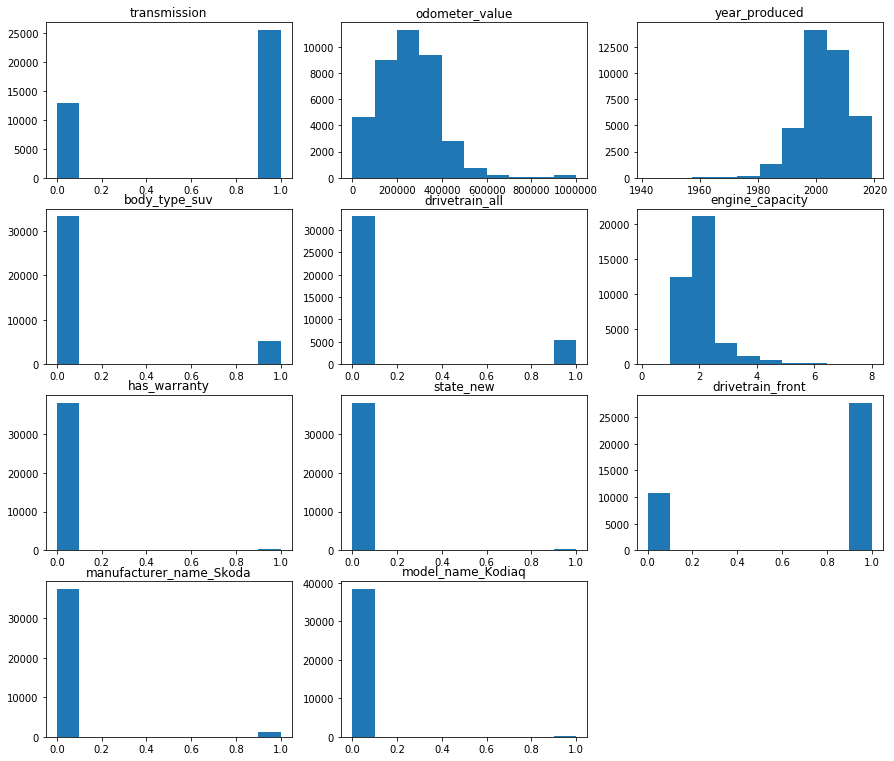

In [77]:
plt.figure(figsize = (15, 20))
num = 1
for i in col_strong_corr:
    plt.subplot(6,3, num)
    plt.hist(X_corr[i])
    plt.title(i)
    num +=1
plt.show()


In [ ]:
X2train, X2test, y2train, y2test = train_test_split(X_corr, y, test_size = 0.2, random_state = 77)

In [ ]:
X2train = sm.add_constant(X2train)
train_results = sm.OLS(y2train,X2train).fit()
print(train_results.summary())

In [ ]:
lrm2 = LinearRegression()
lrm2.fit(X2train, y2train)
lrm2_preds_train = lrm2.predict(X2train)
lrm2_preds_test = lrm2.predict(X2test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
print("R-squared of the model in the training set is: {}".format(lrm2.score(X2train, y2train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm2.score(X2test, y2test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2test, lrm2_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y2test, lrm2_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2test, lrm2_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2test - lrm2_preds_test) / y2test)) * 100))

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

print(cross_val_score(lrm2, X2train, y2train, cv=5))

In [ ]:
print(cross_val_score(lrm, X_corr, y, cv=5))